In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-dl-car-classification/train.zip
/kaggle/input/sf-dl-car-classification/sample-submission.csv
/kaggle/input/sf-dl-car-classification/test.zip
/kaggle/input/sf-dl-car-classification/train.csv
/kaggle/input/model-18/preds_nnl_df.csv
/kaggle/input/model-18/x_df.csv
/kaggle/input/model-18/nnl_df.csv
/kaggle/input/model-18/model_18.hdf5
/kaggle/input/model-18/train_true_df.csv
/kaggle/input/model-18/NasNetLarge.hdf5
/kaggle/input/model-18/preds_x_df.csv


In [2]:
nnl_df = pd.read_csv('../input/model-18/nnl_df.csv') # Прогноз NasNetLarge на test
x_df = pd.read_csv('../input/model-18/x_df.csv') # Прогноз Xception на test
preds_nnl_df = pd.read_csv('../input/model-18/preds_nnl_df.csv') # Прогноз NasNetLarge на train
preds_x_df = pd.read_csv('../input/model-18/preds_x_df.csv') # Прогноз Xception на train
train_true_df = pd.read_csv('../input/model-18/train_true_df.csv') # Истинные классы на train

In [3]:
cols = list(nnl_df.columns)[:-1]

def acc(x):
    return accuracy_score(train_true_df['Class'], np.argmax((preds_x_df[cols] + x * preds_nnl_df[cols]).values, axis=-1))

### Судя по графику, оптимальный вес для прогнозов NasNetLarge находится в диапазоне от 1 до 5 - возможно, это эффект объединения выборки для обучения и валидации
### Серия сабмитов говорит в пользу диапазона от 8 до 12

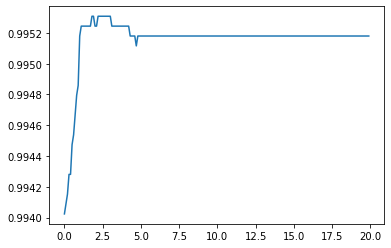

In [4]:
t = np.arange(0,20,0.1)
y = [acc(x) for x in t]
weight = t[np.argmax(y)]
plt.plot(t, y);

In [5]:
cols = list(nnl_df.columns)[:-1]
weight = 10
submission = pd.DataFrame({'Id': nnl_df['Id'], 'Category': (weight * nnl_df[cols] + x_df[cols]).idxmax(axis = 1)})
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,Category
0,305108.jpg,7
1,295075.jpg,6
2,31197.jpg,4
3,93598.jpg,9
4,87877.jpg,7
